In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [26]:
# Load dataset
file_path = 'Fuel_cell_performance_data-Full.csv'
dataset = pd.read_csv(file_path)

In [27]:
# first few rows of dataset
dataset.head(), dataset.columns

(     F1    F2    F3     F4      F5    F6     F7     F8   F9   F10      F11  \
 0  52.9  1.33  49.1  37.13  129.43  35.0  0.281  112.7  207  0.55   98.971   
 1  87.6  2.12  48.8  42.10  171.07  37.6  0.153  157.4  188  0.86  101.179   
 2  73.3  2.72  93.8  20.11  163.69  44.3  0.367  348.7  270  1.87   98.919   
 3  65.6  2.58  48.1  35.11   63.37  32.5  0.279  321.2  322  1.75  101.560   
 4  39.6  2.58  49.3  32.93   63.40  47.0  0.149  205.6  203  1.55   98.148   
 
     F12   F13   F14   F15  Target1  Target2  Target3  Target4  Target5  
 0  2.87  1362  15.9   429    0.959    1.531     79.3     4.19    33.29  
 1  2.34  5130  26.1  1819    0.728    1.690     57.2     5.19    34.50  
 2  2.13  7811  16.7  1763    0.784    1.865     61.6     7.77   129.28  
 3  2.91  1641  32.1   203    0.884    1.920     71.3     8.40   186.65  
 4  1.93  7648  27.5   276    0.736    1.711     58.5     4.75    52.32  ,
 Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
   

In [28]:
# Selected the target 'Target5' and dropped other target columns 
X = dataset.drop(['Target1', 'Target2', 'Target3', 'Target4', 'Target5'], axis=1)
y = dataset['Target5']

In [29]:
# Split training (70%) and testing (30%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# All Prediction models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor(),
    "Lasso Regression": Lasso()
}

In [31]:
# Loop to Run each model and evaluate performance
results = {}
predictions = {}
for model_name, model in models.items():
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    
    r2 = r2_score(y_test, y_pred)
    results[model_name] = r2

In [32]:
# Getting the best model based on R² score
best_model_name = max(results, key=results.get)
best_r2_score = results[best_model_name]

In [33]:
# Results and the best model
print("Model Performance:")
for model, score in results.items():
    print(f"{model}: R² = {score:.4f}")
print(f"\nBest Model: {best_model_name} with R² = {best_r2_score:.4f}")

Model Performance:
Linear Regression: R² = 0.6943
Random Forest: R² = 0.7762
Support Vector Regressor (SVR): R² = -0.0815
Decision Tree: R² = 0.5584
Gradient Boosting: R² = 0.7737
KNN: R² = -0.0028
Lasso Regression: R² = 0.6973

Best Model: Random Forest with R² = 0.7762


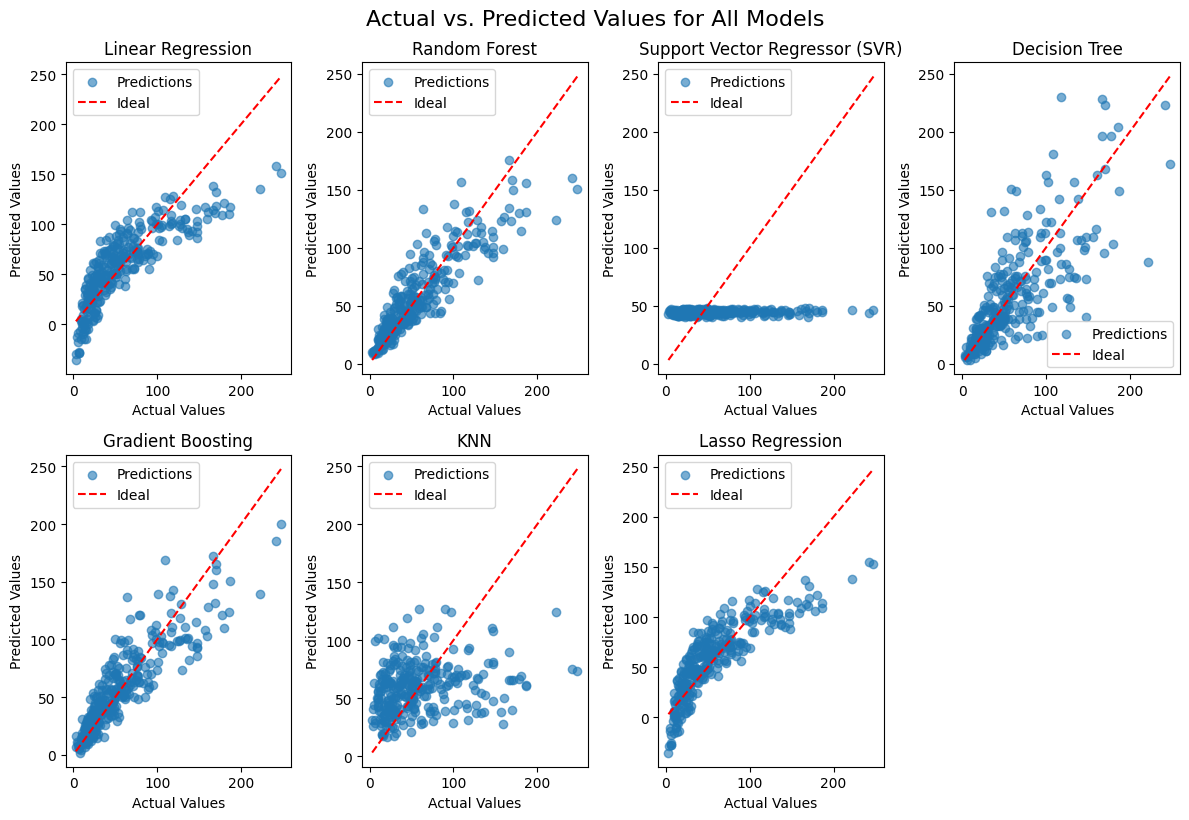

In [34]:
# Scatter plots for Actual vs. Predicted values for each model
plt.figure(figsize=(12, 8))
for i, (model_name, y_pred) in enumerate(predictions.items()):
    plt.subplot(2, 4, i+1)
    plt.scatter(y_test, y_pred, alpha=0.6, label='Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
    plt.title(f"{model_name}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.tight_layout()
plt.suptitle("Actual vs. Predicted Values for All Models", y=1.02, fontsize=16)
plt.show()

In [35]:
# Residual plots for the best model
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)
residuals = y_test - best_pred

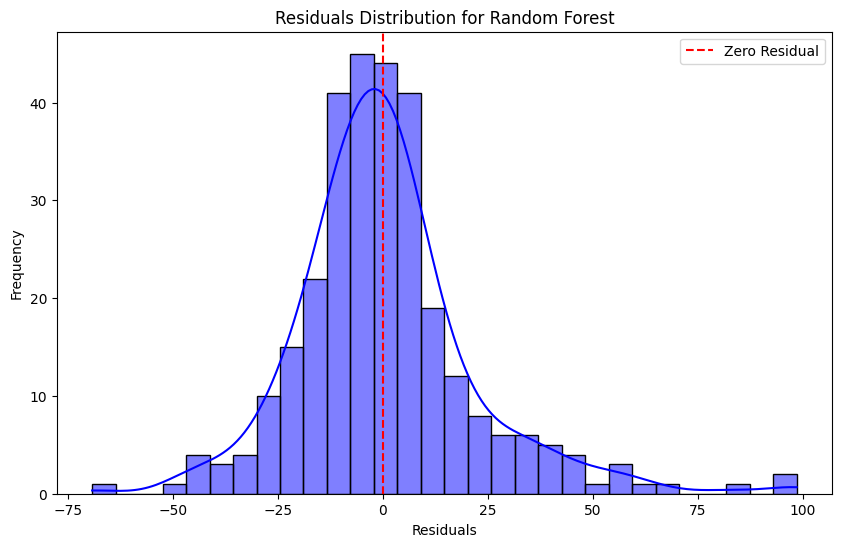

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title(f"Residuals Distribution for {best_model_name}")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label='Zero Residual')
plt.legend()
plt.show()